# Balanceo de equipos de proyecto

**Alumno:** VASQUEZ RAMOS, Jose Manuel

**Fecha:** 20/05/2025

___

## Contexto académico & objetivo

Se requiere formar 5 equipos de 4 alumnos equilibrando promedio ponderado de GPA y habilidades (categorías).

## Indicaciones clave

Representa solución como listas de índices. Función de aptitud = suma de varianzas de GPA + penalización por desequilibrio de habilidades. Vecino: swap de dos alumnos de equipos distintos. Resultados: composición de equipos y métricas.

## Librerías

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from copy import deepcopy

## Control de aleatoriedad

In [2]:
np.random.seed(42)
random.seed(42)

## Dataset

In [3]:
df = pd.read_csv('dataset/students.csv')
students = df.to_dict('records')

df.head()

,StudentID,GPA,Skill
0,S01,14.24,Backend
1,S02,15.55,Data
2,S03,12.87,Data
3,S04,17.07,Data
4,S05,14.15,Backend


## Funciones

In [4]:
# Inicializar solución aleatoria
def initial_solution(n_teams=5, team_size=4):
    indices = list(range(len(students)))
    random.shuffle(indices)
    return [indices[i*team_size:(i+1)*team_size] for i in range(n_teams)]

# Función de aptitud
def fitness(solution):
    total_variance = 0
    skill_penalty = 0

    for team in solution:
        gpas = [students[i]['GPA'] for i in team]
        skills = [students[i]['Skill'] for i in team]

        # Varianza GPA
        total_variance += np.var(gpas)

        # Penalización por skills desbalanceadas
        skill_counts = Counter(skills)
        penalty = max(skill_counts.values()) - min(skill_counts.values())
        skill_penalty += penalty

    return total_variance + skill_penalty  # menor es mejor

# Generar vecinos (swap entre estudiantes de equipos distintos)
def get_neighbors(solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i+1, len(solution)):
            for a in range(len(solution[i])):
                for b in range(len(solution[j])):
                    new_sol = deepcopy(solution)
                    new_sol[i][a], new_sol[j][b] = new_sol[j][b], new_sol[i][a]
                    neighbors.append(new_sol)
    return neighbors

# 5. Hill Climbing
def hill_climb(iterations=100):
    current = initial_solution()
    current_score = fitness(current)
    scores = [current_score]

    for it in range(iterations):
        neighbors = get_neighbors(current)
        best_neighbor = min(neighbors, key=fitness)
        best_score = fitness(best_neighbor)

        if best_score < current_score:
            current, current_score = best_neighbor, best_score

        scores.append(current_score)

    return current, scores

## Ejecución y resultados

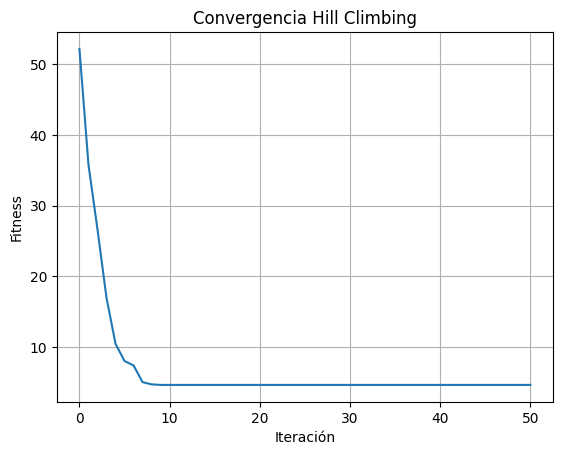

In [5]:
# Ejecutar
solution, score_history = hill_climb(50)

# Graficar convergencia
plt.plot(score_history)
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.title('Convergencia Hill Climbing')
plt.grid(True)
plt.show()

In [6]:
for i, team in enumerate(solution):
    print(f"Equipo {i+1}:")
    for idx in team:
        s = students[idx]
        print(f"  {s['StudentID']} | GPA: {s['GPA']} | Skill: {s['Skill']}")
    print()

print(f"Aptitud final: {fitness(solution):.4f}")

Equipo 1:
  S02 | GPA: 15.55 | Skill: Data
  S01 | GPA: 14.24 | Skill: Backend
  S04 | GPA: 17.07 | Skill: Data
  S05 | GPA: 14.15 | Skill: Backend

Equipo 2:
  S10 | GPA: 12.33 | Skill: Frontend
  S09 | GPA: 10.46 | Skill: Backend
  S18 | GPA: 12.49 | Skill: Backend
  S19 | GPA: 11.06 | Skill: Data

Equipo 3:
  S06 | GPA: 13.61 | Skill: Data
  S03 | GPA: 12.87 | Skill: Data
  S16 | GPA: 12.97 | Skill: Data
  S11 | GPA: 13.49 | Skill: Data

Equipo 4:
  S14 | GPA: 19.69 | Skill: Backend
  S08 | GPA: 19.25 | Skill: DevOps
  S13 | GPA: 19.85 | Skill: DevOps
  S17 | GPA: 19.92 | Skill: Backend

Equipo 5:
  S12 | GPA: 18.15 | Skill: Data
  S20 | GPA: 19.51 | Skill: Frontend
  S07 | GPA: 18.29 | Skill: DevOps
  S15 | GPA: 19.05 | Skill: Frontend

Aptitud final: 4.6169
